Group:

*   Akbar Muhammad Prakoso (1301213225)
*   Fathan Askar (1301213374)
*   Fawaz Al Rasyid (1301213016)
*   Haikal ali (1103223071)
*   aprilianza muhammad yusup (103012300025)


NB (Akbar)

In [ ]:
pip install pandas nltk textblob scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
column_names  = ['id', 'Konteks','Response','Komentar']
df = pd.read_csv('/content/drive/MyDrive/School/twitter_training.csv', header=None, names=column_names)
df

id      Konteks  Response  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                Komentar  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[74682 rows x 4 columns]

Explorasi Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tampilkan lima baris pertama dataset
print("Lima Baris Pertama Dataset:")
print(df.head())
plt.show()

Lima Baris Pertama Dataset:
     id      Konteks  Response  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                            Komentar  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [ ]:
# Informasi dataset
print("\nInformasi Dataset:")
print(df.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        74682 non-null  int64 
 1   Konteks   74682 non-null  object
 2   Response  74682 non-null  object
 3   Komentar  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


In [ ]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
                 id
count  74682.000000
mean    6432.586165
std     3740.427870
min        1.000000
25%     3195.000000
50%     6422.000000
75%     9601.000000
max    13200.000000


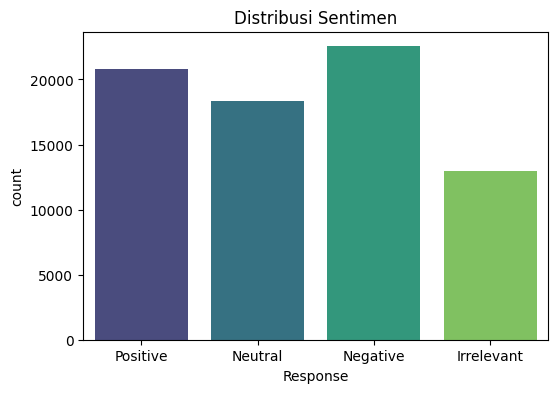

In [ ]:
# Distribusi sentimen
plt.figure(figsize=(6, 4))
sns.countplot(x='Response', data=df, palette='viridis')
plt.title('Distribusi Sentimen')
plt.show()

In [ ]:
#Hapus baris yang ada null
df = df.dropna(axis=0)

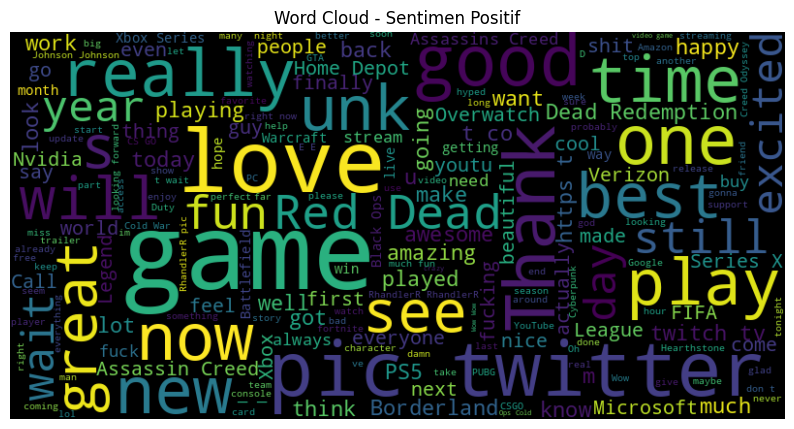

In [ ]:
# Word cloud untuk teks positif
from wordcloud import WordCloud

positive_texts = ' '.join(df[df['Response'] == 'Positive']['Komentar'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(positive_texts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud - Sentimen Positif')
plt.show()



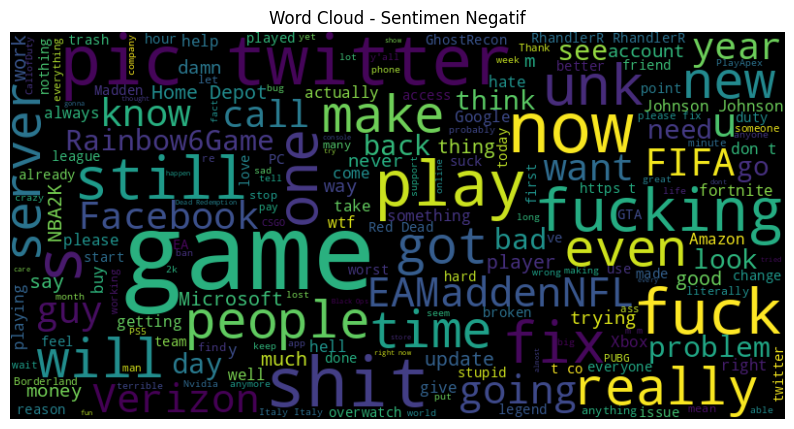

In [ ]:
# Word cloud untuk teks negatif
negative_texts = ' '.join(df[df['Response'] == 'Negative']['Komentar'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(negative_texts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud - Sentimen Negatif')
plt.show()

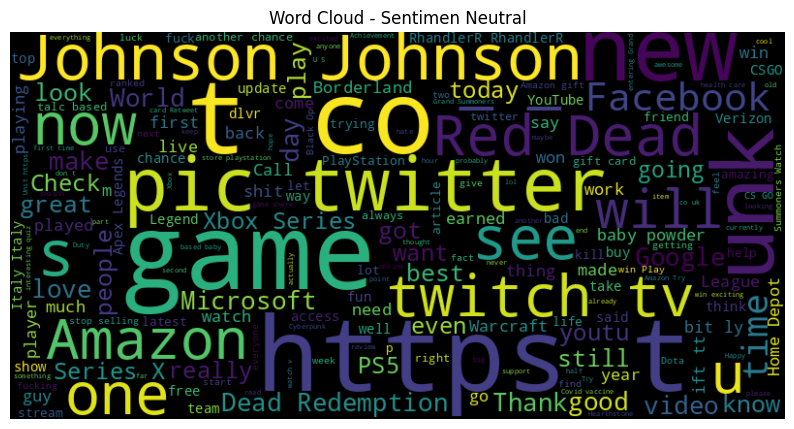

In [ ]:
# Word cloud untuk teks Neutral
negative_texts = ' '.join(df[df['Response'] == 'Neutral']['Komentar'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(negative_texts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud - Sentimen Neutral')
plt.show()

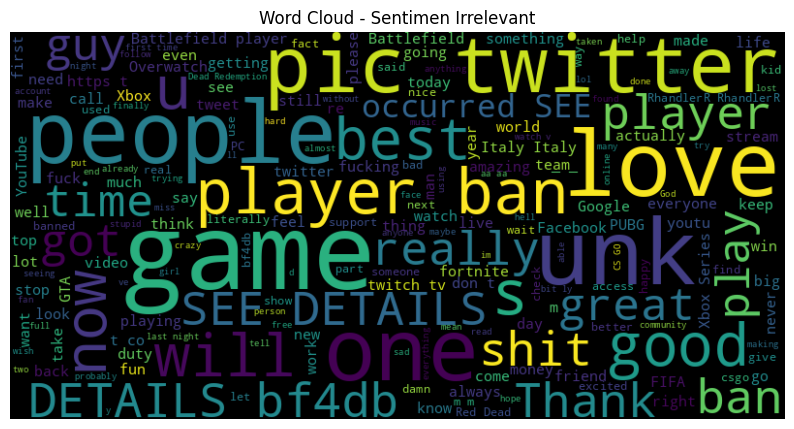

In [ ]:
# Word cloud untuk teks Neutral
negative_texts = ' '.join(df[df['Response'] == 'Irrelevant']['Komentar'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(negative_texts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud - Sentimen Irrelevant')
plt.show()

Data Proccecing

In [ ]:
#Memasukan Data validasi
column_names  = ['id', 'Konteks','Response','Komentar']
df_validation = pd.read_csv('/content/drive/MyDrive/School/twitter_validation.csv', header=None, names=column_names)

#Hapus baris yang ada null
df_validation = df_validation.dropna(axis=0)
df_validation

id              Konteks    Response  \
0    3364             Facebook  Irrelevant   
1     352               Amazon     Neutral   
2    8312            Microsoft    Negative   
3    4371                CS-GO    Negative   
4    4433               Google     Neutral   
..    ...                  ...         ...   
995  4891  GrandTheftAuto(GTA)  Irrelevant   
996  4359                CS-GO  Irrelevant   
997  2652          Borderlands    Positive   
998  8069            Microsoft    Positive   
999  6960      johnson&johnson     Neutral   

                                              Komentar  
0    I mentioned on Facebook that I was struggling ...  
1    BBC News - Amazon boss Jeff Bezos rejects clai...  
2    @Microsoft Why do I pay for WORD when it funct...  
3    CSGO matchmaking is so full of closet hacking,...  
4    Now the President is slapping Americans in the...  
..                                                 ...  
995  ⭐️ Toronto is the arts and culture capital of ...  
996  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...  
997  Today sucked so it’s time to drink wine n play...  
998  Bought a fraction of Microsoft today. Small wins.  
999  Johnson & Johnson to stop selling talc baby po...  

[1000 rows x 4 columns]

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Preprocessing Teks
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['clean_Komentar'] = df['Komentar'].apply(preprocess_text)
df_validation['clean_Komentar'] = df_validation['Komentar'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-82-4539fd99271a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_Komentar'] = df['Komentar'].apply(preprocess_text)


In [ ]:
# Pembagian dataset
#X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['Komentar'], test_size=0.2, random_state=42)


In [ ]:
# Menggunakan dataset yang telah dibagi dari file validasi
X_train, y_train = df['clean_Komentar'], df['Response']
X_test, y_test = df_validation['clean_Komentar'], df_validation['Response']

In [ ]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Model Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

NB Model (Akbar)

In [ ]:
# Evaluasi Model
y_pred = nb_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.723
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.78      0.54      0.64       172
    Negative       0.66      0.83      0.74       266
     Neutral       0.81      0.63      0.71       285
    Positive       0.71      0.83      0.76       277

    accuracy                           0.72      1000
   macro avg       0.74      0.71      0.71      1000
weighted avg       0.74      0.72      0.72      1000



In [ ]:
# Import library yang diperlukan
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Fungsi untuk prediksi sentimen dengan empat kelas
def predict_sentiment(text):
    cleaned_text = preprocess_text(text)
    vectorized_text = tfidf_vectorizer.transform([cleaned_text])
    prediction = nb_model.predict(vectorized_text)[0]

    if prediction == 'Positive':
        return "Positive"
    elif prediction == 'Negative':
        return "Negative"
    elif prediction == 'Neutral':
        return "Nature"
    elif prediction == 'Irrelevant':
        return "Irrelevant"
    else:
        return "Uncertain"  # Jika kelas tidak dikenali

# Contoh penggunaan:
text_to_predict = "I love Nasi Goreng"
result = predict_sentiment(text_to_predict)
print(result)


Positive


In [ ]:
# Uji Model dengan Input Pengguna
user_input = input("Masukkan teks untuk diuji sentimennya: ")
prediction_output = predict_sentiment(user_input)
print(f'Prediksi Sentimen: {prediction_output}')

Masukkan teks untuk diuji sentimennya: fifa is a good game
Prediksi Sentimen: Positive


Linear SVC Model (Fathan)

In [ ]:
#Lienar SVM Classifier Model
from sklearn.svm import SVC
tfidf_vectorizer = TfidfVectorizer(max_features=5000) #Untuk melihat/mengukur seberapa penting sebuah data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
#Membuat Modelnya
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

LinearSVC()

In [ ]:
#Function untuk memprediksi sentiment sebuah text
def predict_sentiment_svm(text):
    cleaned_text = preprocess_text(text)
    vectorized_text = tfidf_vectorizer.transform([cleaned_text])
    prediction = svm_model.predict(vectorized_text)[0]

    if prediction == 'Positive':
        return "Positive"
    elif prediction == 'Negative':
        return "Negative"
    elif prediction == 'Neutral':
        return "Neutral"
    elif prediction == 'Irrelevant':
        return "Irrelevant"
    else:
        return "Uncertain"

result_svm = predict_sentiment_svm(text_to_predict)
print(result_svm)

Positive


In [ ]:
#Mencoba prediksi model dengan menginputkan text
user_input_svm = input("Masukkan teks untuk diuji sentimennya dengan SVM: ")
prediction_output_svm = predict_sentiment_svm(user_input_svm)
print(f'Prediksi Sentimen (SVM): {prediction_output_svm}')

Masukkan teks untuk diuji sentimennya dengan SVM: fifa is a bad game
Prediksi Sentimen (SVM): Negative


In [ ]:
#Evaluasi Model SVC
y_pred_svm = svm_model.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f'SVM Accuracy: {accuracy_svm}')
print(f'SVM Classification Report:\n{report_svm}')

SVM Accuracy: 0.843
SVM Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.84      0.78      0.81       172
    Negative       0.82      0.88      0.85       266
     Neutral       0.89      0.80      0.84       285
    Positive       0.83      0.89      0.86       277

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



FastText (Aprillanza)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/School/twitter_training.csv', names = ["index", "platform", "value", "comments"], header = None)
print(df.shape)
df.head(3)

(74682, 4)


index     platform     value  \
0   2401  Borderlands  Positive   
1   2401  Borderlands  Positive   
2   2401  Borderlands  Positive   

                                            comments  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...

In [ ]:
df.value.value_counts()

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: value, dtype: int64

In [ ]:
#menghapus data null
df.dropna(inplace=True)
df.shape

(73996, 4)

In [ ]:
df['value'] = "__label__" + df['value'].astype(str)
df.head(3)

index     platform              value  \
0   2401  Borderlands  __label__Positive   
1   2401  Borderlands  __label__Positive   
2   2401  Borderlands  __label__Positive   

                                            comments  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...

In [ ]:
df_validation = pd.read_csv('/content/drive/MyDrive/School/twitter_validation.csv', names = ["index","platform", "value", "comments"], header = None)
print(df_validation.shape)
df_validation.head(3)

(1000, 4)


index   platform       value  \
0   3364   Facebook  Irrelevant   
1    352     Amazon     Neutral   
2   8312  Microsoft    Negative   

                                            comments  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...

In [ ]:
df_validation.dropna(inplace=True)
df_validation.shape

(1000, 4)

In [ ]:
df_validation['value'] = "__label__" + df_validation['value'].astype(str)

print(df_validation.head(3))

   index   platform                value  \
0   3364   Facebook  __label__Irrelevant   
1    352     Amazon     __label__Neutral   
2   8312  Microsoft    __label__Negative   

                                            comments  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...  


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

# Preprocessing Teks
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['clean_comments'] = df['comments'].apply(preprocess_text)
df_validation['clean_comments'] = df_validation['comments'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df_validation.head(25)

index                platform                value  \
0    3364                Facebook  __label__Irrelevant   
1     352                  Amazon     __label__Neutral   
2    8312               Microsoft    __label__Negative   
3    4371                   CS-GO    __label__Negative   
4    4433                  Google     __label__Neutral   
5    6273                    FIFA    __label__Negative   
6    7925               MaddenNFL    __label__Positive   
7   11332    TomClancysRainbowSix    __label__Positive   
8    1107          AssassinsCreed    __label__Positive   
9    2069              CallOfDuty    __label__Negative   
10   3185                   Dota2    __label__Positive   
11   1172          AssassinsCreed    __label__Positive   
12  11783                 Verizon    __label__Negative   
13   4286                   CS-GO     __label__Neutral   
14   8431                   NBA2K    __label__Negative   
15   9135                  Nvidia    __label__Positive   
16   4822     GrandTheftAuto(GTA)    __label__Positive   
17   3068                   Dota2    __label__Negative   
18  10537  RedDeadRedemption(RDR)    __label__Positive   
19   8056               Microsoft    __label__Negative   
20   2131              CallOfDuty    __label__Negative   
21   5450             Hearthstone     __label__Neutral   
22   2286              CallOfDuty  __label__Irrelevant   
23   4038                   CS-GO    __label__Negative   
24    526             ApexLegends     __label__Neutral   

                                             comments  \
0   I mentioned on Facebook that I was struggling ...   
1   BBC News - Amazon boss Jeff Bezos rejects clai...   
2   @Microsoft Why do I pay for WORD when it funct...   
3   CSGO matchmaking is so full of closet hacking,...   
4   Now the President is slapping Americans in the...   
5   Hi @EAHelp I’ve had Madeleine McCann in my cel...   
6   Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...   
7   Rocket League, Sea of Thieves or Rainbow Six: ...   
8   my ass still knee-deep in Assassins Creed Odys...   
9   FIX IT JESUS ! Please FIX IT ! What In the wor...   
10  The professional dota 2 scene is fucking explo...   
11  Itching to assassinate \n\n#TCCGif #AssassinsC...   
12  @FredTJoseph hey fred, Comcast cut the cable a...   
13  CSGO WIngman (Im Silver dont bully) twitch.tv/...   
14  @NBA2K game sucks... down by 2 with 38 seconds...   
15  Congrats to the NVIDIA NeMo team for the 1.0.0...   
16                                  yeah and it’s fun   
17                                     fuck my life 😆   
18  happy birthday red dead redemption that shit c...   
19  What does that say about Microsoft hardware & ...   
20     The new @CallofDuty for ps5 is 🔥🔥🔥🔥\nOh God 😭😍   
21  Anyone that plays a bad luck albatross deck in...   
22  Call of duty warzone (livestream) w/ subs #War...   
23  Finally played Rainbow Six Siege for the first...   
24  Umm @PlayApex  when I died it said Bug This pi...   

                                       clean_comments  
0   mentioned facebook struggling motivation go ru...  
1   bbc news amazon boss jeff bezos rejects claims...  
2   microsoft pay word functions poorly samsungus ...  
3   csgo matchmaking full closet hacking truly awf...  
4   president slapping americans face really commi...  
5   hi eahelp madeleine mccann cellar past years l...  
6   thank eamaddennfl new te austin hooper orange ...  
7   rocket league sea thieves rainbow six love pla...  
8   ass still assassins creed odyssey way anytime ...  
9   fix jesus please fix world going playstation a...  
10  professional dota scene fucking exploding comp...  
11  itching assassinate tccgif assassinscreedblack...  
12  fredtjoseph hey fred comcast cut cable verizon...  
13                  csgo wingman im silver dont bully  
14   game sucks seconds left team intentionally fouls  
15  congrats nvidia nemo team release candidate re...  
16                                           yeah fun  
17  

In [ ]:
df['supervised'] = df['value'] + " " + df['clean_comments']
df_validation['supervised'] = df_validation['value'] + " " + df_validation['clean_comments']


In [ ]:
df_validation.head()

index   platform                value  \
0   3364   Facebook  __label__Irrelevant   
1    352     Amazon     __label__Neutral   
2   8312  Microsoft    __label__Negative   
3   4371      CS-GO    __label__Negative   
4   4433     Google     __label__Neutral   

                                            comments  \
0  I mentioned on Facebook that I was struggling ...   
1  BBC News - Amazon boss Jeff Bezos rejects clai...   
2  @Microsoft Why do I pay for WORD when it funct...   
3  CSGO matchmaking is so full of closet hacking,...   
4  Now the President is slapping Americans in the...   

                                      clean_comments  \
0  mentioned facebook struggling motivation go ru...   
1  bbc news amazon boss jeff bezos rejects claims...   
2  microsoft pay word functions poorly samsungus ...   
3  csgo matchmaking full closet hacking truly awf...   
4  president slapping americans face really commi...   

                                          supervised  
0  __label__Irrelevant mentioned facebook struggl...  
1  __label__Neutral bbc news amazon boss jeff bez...  
2  __label__Negative microsoft pay word functions...  
3  __label__Negative csgo matchmaking full closet...  
4  __label__Neutral president slapping americans ...

In [ ]:
from sklearn.model_selection import train_test_split
train, test = df, df_validation

In [ ]:
train.shape, test.shape

((73996, 6), (1000, 6))

In [ ]:
train.to_csv("tweet.train", columns=["supervised"], index=False,header=False)
test.to_csv("tweet.test", columns=["supervised"], index=False,header=False)

In [ ]:
!pip install fasttext
import fasttext
model = fasttext.train_supervised(input="tweet.train")
model.test("tweet.test")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199773 sha256=ec9fd30a33a299f3ad6dcec2397c878cea2558f1dc69eb57fe6bc733e8689374
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


(1000, 0.863, 0.863)

In [ ]:
user_input = input("Masukkan teks untuk diuji sentimennya: ")
prediction_output = model.predict(user_input)
print(f'Prediksi Sentimen: {prediction_output}')

Masukkan teks untuk diuji sentimennya: noob
Prediksi Sentimen: (('__label__Neutral',), array([0.91017616]))


Logistic Regression (Haikal)

In [ ]:
pip install nltk

In [ ]:
pip install pillow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud
from PIL import Image

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# bikin headers yg baru
columns_format = ['id', 'Konteks','Response','Komentar']

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/School/twitter_training.csv", header=None, names=columns_format)
df

id      Konteks  Response  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                Komentar  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[74682 rows x 4 columns]

In [ ]:
# tampilkan info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        74682 non-null  int64 
 1   Konteks   74682 non-null  object
 2   Response  74682 non-null  object
 3   Komentar  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


In [ ]:
# statistik deskriptif
print(df.describe())

                 id
count  74682.000000
mean    6432.586165
std     3740.427870
min        1.000000
25%     3195.000000
50%     6422.000000
75%     9601.000000
max    13200.000000


In [ ]:
#Hapus baris yang ada kosong
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        73996 non-null  int64 
 1   Konteks   73996 non-null  object
 2   Response  73996 non-null  object
 3   Komentar  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [ ]:
# hapus double
df.drop_duplicates()
df.shape

(73996, 4)

In [ ]:
# banyaknya jenis review
df['Response'].value_counts()

Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: Response, dtype: int64

In [ ]:
df

id      Konteks  Response  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                Komentar  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[73996 rows x 4 columns]

In [ ]:
df['Response'].value_counts()

Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: Response, dtype: int64

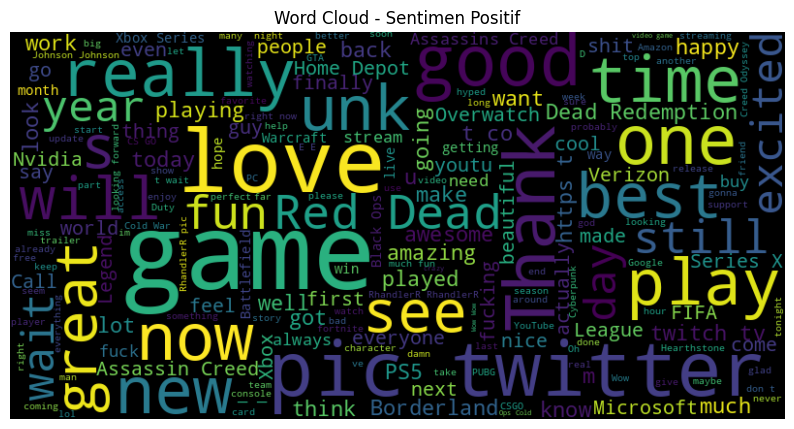

In [ ]:
positive_texts = ' '.join(df[df['Response'] == 'Positive']['Komentar'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(positive_texts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud - Sentimen Positif')
plt.show()

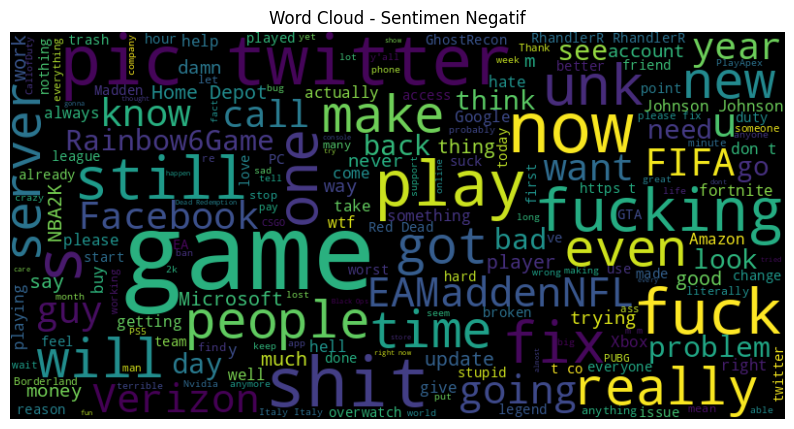

In [ ]:
negative_texts = ' '.join(df[df['Response'] == 'Negative']['Komentar'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(negative_texts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud - Sentimen Negatif')
plt.show()

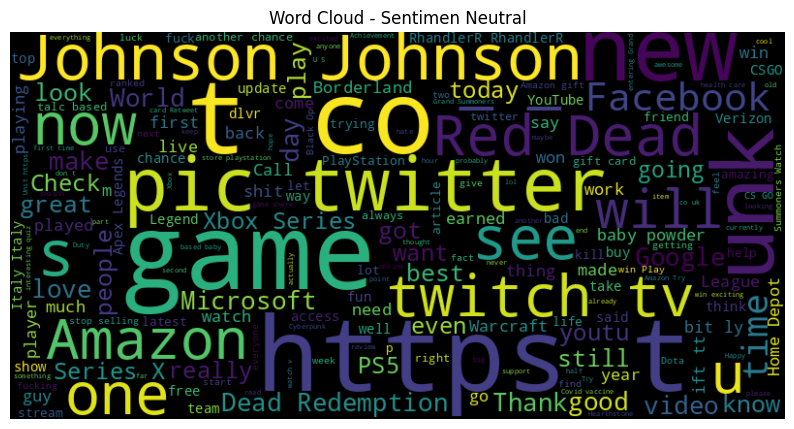

In [ ]:
negative_texts = ' '.join(df[df['Response'] == 'Neutral']['Komentar'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(negative_texts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud - Sentimen Neutral')
plt.show()

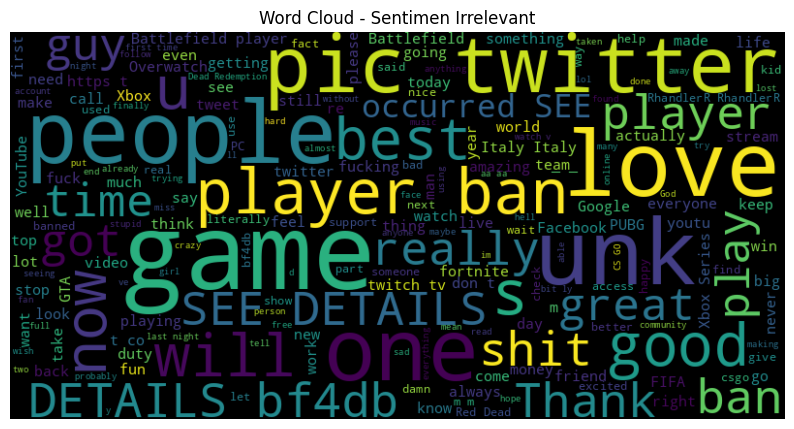

In [ ]:
negative_texts = ' '.join(df[df['Response'] == 'Irrelevant']['Komentar'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(negative_texts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud - Sentimen Irrelevant')
plt.show()

In [ ]:
pip install tqdm

In [ ]:
# bikin headers yg baru
columns_format = ['id', 'Konteks','Response','Komentar']
df_validation = pd.read_csv("/content/drive/MyDrive/School/twitter_validation.csv", header=None, names=columns_format)

# hapus baris yang kosong
df_validation = df_validation.dropna(axis=0)

In [ ]:
df_validation

id              Konteks    Response  \
0    3364             Facebook  Irrelevant   
1     352               Amazon     Neutral   
2    8312            Microsoft    Negative   
3    4371                CS-GO    Negative   
4    4433               Google     Neutral   
..    ...                  ...         ...   
995  4891  GrandTheftAuto(GTA)  Irrelevant   
996  4359                CS-GO  Irrelevant   
997  2652          Borderlands    Positive   
998  8069            Microsoft    Positive   
999  6960      johnson&johnson     Neutral   

                                              Komentar  
0    I mentioned on Facebook that I was struggling ...  
1    BBC News - Amazon boss Jeff Bezos rejects clai...  
2    @Microsoft Why do I pay for WORD when it funct...  
3    CSGO matchmaking is so full of closet hacking,...  
4    Now the President is slapping Americans in the...  
..                                                 ...  
995  ⭐️ Toronto is the arts and culture capital of ...  
996  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...  
997  Today sucked so it’s time to drink wine n play...  
998  Bought a fraction of Microsoft today. Small wins.  
999  Johnson & Johnson to stop selling talc baby po...  

[1000 rows x 4 columns]

In [ ]:
df_validation['Response'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: Response, dtype: int64

In [ ]:
import re

In [ ]:
# Preprocessing Teks
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['clean_Komentar'] = df['Komentar'].apply(preprocess_text)
df_validation['clean_Komentar'] = df_validation['Komentar'].apply(preprocess_text)

<ipython-input-141-aedc779c65f9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_Komentar'] = df['Komentar'].apply(preprocess_text)


Training The model

In [ ]:
# Menggunakan dataset yang telah dibagi dari file validasi
x_train, y_train = df['clean_Komentar'], df['Response']
x_test, y_test = df_validation['clean_Komentar'], df_validation['Response']

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(73996,) (73996,) (1000,) (1000,)


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)

X_train_vector = vectorizer.fit_transform(x_train)
X_test_vector = vectorizer.transform(x_test)

Asah Model Pakai logistic regression

In [ ]:
model = LogisticRegression()
model.fit(X_train_vector, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evaluasi Model

In [ ]:
# test akurasi dari data test

x_test_pred = model.predict(X_test_vector)
test_data_accuracy = accuracy_score(y_test, x_test_pred)
report = classification_report(y_test, x_test_pred)

In [ ]:
print(f'Akurasi: {test_data_accuracy}')
print(f'Classification Report:\n{report}')

Akurasi: 0.822
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.84      0.72      0.77       172
    Negative       0.79      0.86      0.82       266
     Neutral       0.84      0.80      0.82       285
    Positive       0.83      0.87      0.85       277

    accuracy                           0.82      1000
   macro avg       0.82      0.81      0.82      1000
weighted avg       0.82      0.82      0.82      1000



Logistic Regression

In [ ]:
X_baru = X_test_vector[200]

print(df_validation['Response'][200], x_test[200])
prediction = model.predict(X_baru)
print('Hasil', prediction)

Neutral johnson johnson pauses vaccine trial patient exhibiting illness
Hasil ['Neutral']


In [ ]:
# Fungsi untuk prediksi sentimen dengan empat kelas
def predict_sentiment(text):
    cleaned_text = preprocess_text(text)
    vectorized_text = vectorizer.transform([cleaned_text])
    prediction = model.predict(vectorized_text)[0]

    if prediction == 'Positive':
        return "Positive"
    elif prediction == 'Negative':
        return "Negative"
    elif prediction == 'Neutral':
        return "Nature"
    elif prediction == 'Irrelevant':
        return "Irrelevant"
    else:
        return "Uncertain"  # Jika kelas tidak dikenali

# Contoh penggunaan:
text_to_predict = 'i like nasi goreng'
result = predict_sentiment(text_to_predict)
print(result)

Positive


In [ ]:
input_user = input('Type your text here: ')
test = predict_sentiment(input_user)
print(f'The result is {test}')

Type your text here: Fifa is a bad game
The result is Negative


LSTM (Fawaz)

In [ ]:
pip install pandas nltk textblob keras

In [ ]:
import pandas as pd
import numpy as np

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
column_names  = ['id', 'Konteks','Response','Komentar']
df = pd.read_csv('/content/drive/MyDrive/School/twitter_training.csv', header=None, names=column_names)
df

id      Konteks  Response  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                Komentar  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[74682 rows x 4 columns]

Explorasi Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tampilkan lima baris pertama dataset
print("Lima Baris Pertama Dataset:")
print(df.head())
plt.show()

Lima Baris Pertama Dataset:
     id      Konteks  Response  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                            Komentar  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [ ]:
# Informasi dataset
print("\nInformasi Dataset:")
print(df.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        74682 non-null  int64 
 1   Konteks   74682 non-null  object
 2   Response  74682 non-null  object
 3   Komentar  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


In [ ]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
                 id
count  74682.000000
mean    6432.586165
std     3740.427870
min        1.000000
25%     3195.000000
50%     6422.000000
75%     9601.000000
max    13200.000000


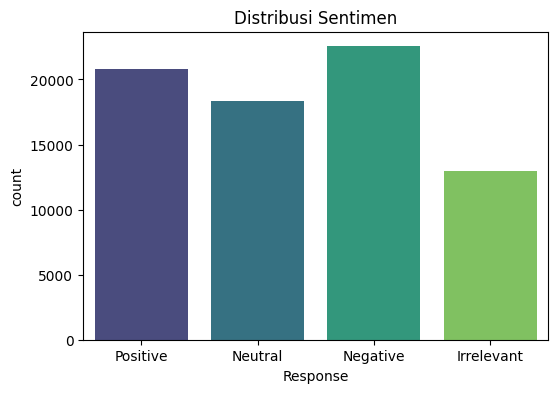

In [ ]:
# Distribusi sentimen
plt.figure(figsize=(6, 4))
sns.countplot(x='Response', data=df, palette='viridis')
plt.title('Distribusi Sentimen')
plt.show()

In [ ]:
#Hapus baris yang ada null
df = df.dropna(axis=0)

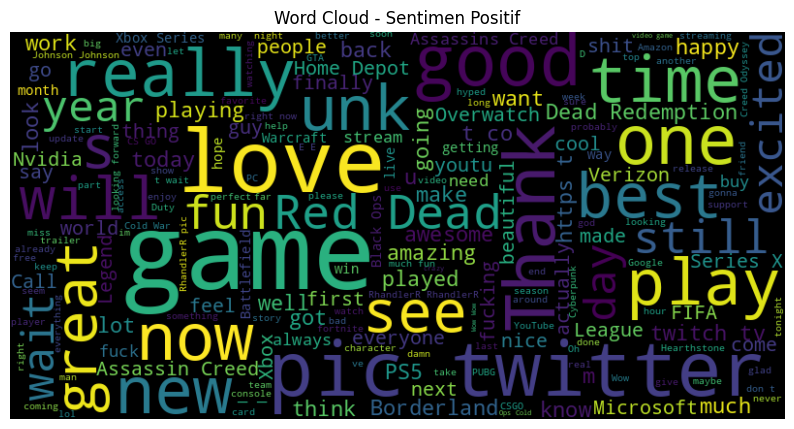

In [ ]:
# Word cloud untuk teks positif
from wordcloud import WordCloud

positive_texts = ' '.join(df[df['Response'] == 'Positive']['Komentar'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(positive_texts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud - Sentimen Positif')
plt.show()



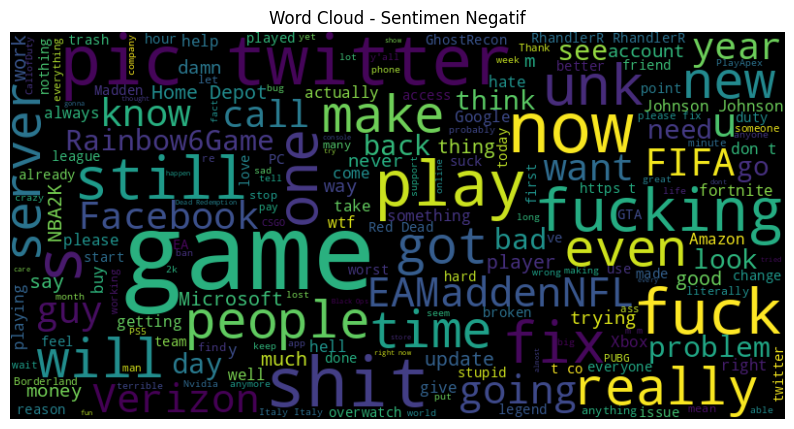

In [ ]:
# Word cloud untuk teks negatif
negative_texts = ' '.join(df[df['Response'] == 'Negative']['Komentar'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(negative_texts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud - Sentimen Negatif')
plt.show()

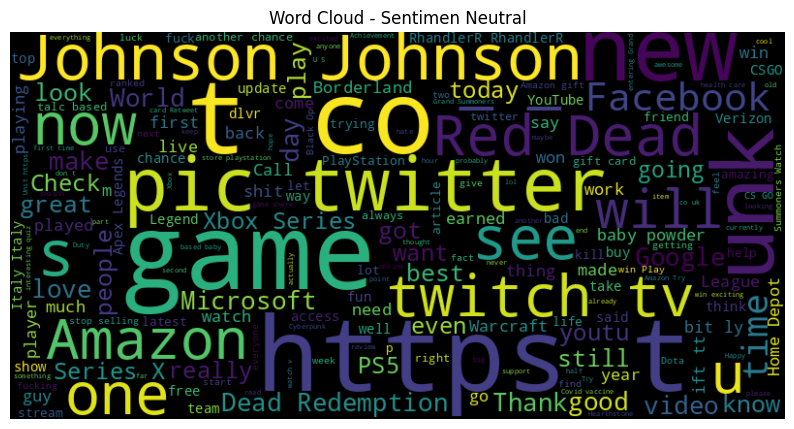

In [ ]:
# Word cloud untuk teks Neutral
negative_texts = ' '.join(df[df['Response'] == 'Neutral']['Komentar'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(negative_texts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud - Sentimen Neutral')
plt.show()

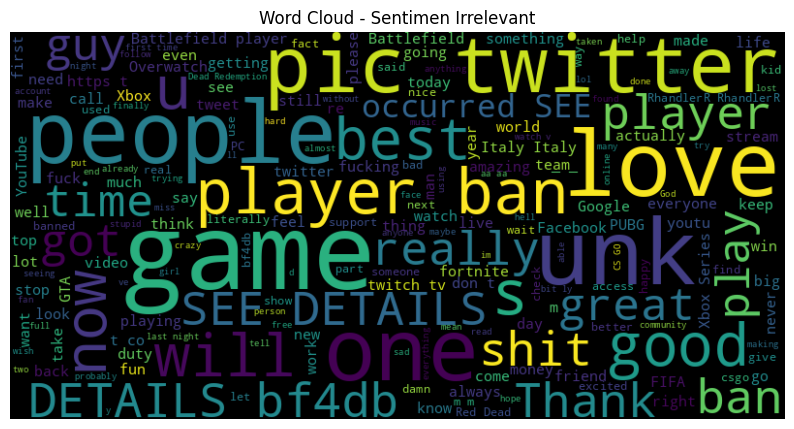

In [ ]:
# Word cloud untuk teks Neutral
negative_texts = ' '.join(df[df['Response'] == 'Irrelevant']['Komentar'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(negative_texts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud - Sentimen Irrelevant')
plt.show()

Data Proccecing

In [ ]:
#Memasukan Data validasi
column_names  = ['id', 'Konteks','Response','Komentar']
df_validation = pd.read_csv('/content/drive/MyDrive/School/twitter_validation.csv', header=None, names=column_names)

#Hapus baris yang ada null
df_validation = df_validation.dropna(axis=0)
df_validation

id              Konteks    Response  \
0    3364             Facebook  Irrelevant   
1     352               Amazon     Neutral   
2    8312            Microsoft    Negative   
3    4371                CS-GO    Negative   
4    4433               Google     Neutral   
..    ...                  ...         ...   
995  4891  GrandTheftAuto(GTA)  Irrelevant   
996  4359                CS-GO  Irrelevant   
997  2652          Borderlands    Positive   
998  8069            Microsoft    Positive   
999  6960      johnson&johnson     Neutral   

                                              Komentar  
0    I mentioned on Facebook that I was struggling ...  
1    BBC News - Amazon boss Jeff Bezos rejects clai...  
2    @Microsoft Why do I pay for WORD when it funct...  
3    CSGO matchmaking is so full of closet hacking,...  
4    Now the President is slapping Americans in the...  
..                                                 ...  
995  ⭐️ Toronto is the arts and culture capital of ...  
996  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...  
997  Today sucked so it’s time to drink wine n play...  
998  Bought a fraction of Microsoft today. Small wins.  
999  Johnson & Johnson to stop selling talc baby po...  

[1000 rows x 4 columns]

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Preprocessing Teks
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['clean_Komentar'] = df['Komentar'].apply(preprocess_text)
df_validation['clean_Komentar'] = df_validation['Komentar'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-21-4539fd99271a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_Komentar'] = df['Komentar'].apply(preprocess_text)


In [ ]:
# Menggunakan dataset yang telah dibagi dari file validasi untuk memisahkan data latih dan data uji
X_train, y_train = df['clean_Komentar'], df['Response']
X_test, y_test = df_validation['clean_Komentar'], df_validation['Response']

In [ ]:
# Menentukan jumlah kata maksimum dan panjang teks maksimum
max_words = 5000
max_len = 100

In [ ]:
# Membuat tokenisasi dengan membatasi jumlah kata maksimum
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

In [ ]:
# Mengonversi teks ke dalam urutan token
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Padding agar setiap sampel memiliki panjang yang sama
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)

In [ ]:
# Membuat label encoder dan mengonversi label teks menjadi nilai numerik
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Menentukan dimensi embedding dan unit LSTM
embedding_dim = 128
lstm_units = 64

In [ ]:
# Model LSTM
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 5
model.fit(X_train_padded, y_train_encoded, batch_size=batch_size, epochs=epochs, validation_data=(X_test_padded, y_test_encoded))

Epoch 1/5
2313/2313 [==============================] - 480s 205ms/step - loss: 0.9324 - accuracy: 0.6189 - val_loss: 0.5335 - val_accuracy: 0.8160
Epoch 2/5
2313/2313 [==============================] - 465s 201ms/step - loss: 0.6551 - accuracy: 0.7448 - val_loss: 0.3745 - val_accuracy: 0.8840
Epoch 3/5
2313/2313 [==============================] - 445s 192ms/step - loss: 0.5304 - accuracy: 0.7950 - val_loss: 0.3379 - val_accuracy: 0.8910
Epoch 4/5
2313/2313 [==============================] - 431s 186ms/step - loss: 0.4531 - accuracy: 0.8252 - val_loss: 0.3185 - val_accuracy: 0.9040
Epoch 5/5
2313/2313 [==============================] - 430s 186ms/step - loss: 0.3955 - accuracy: 0.8475 - val_loss: 0.2988 - val_accuracy: 0.9210


In [ ]:
# Evaluasi Model
y_pred_prob = model.predict(X_test_padded)
y_pred = y_pred_prob.argmax(axis=1)
class_names = label_encoder.classes_

accuracy = accuracy_score(y_test_encoded, y_pred)
report = classification_report(y_test_encoded, y_pred, target_names=class_names)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

32/32 [==============================] - 2s 48ms/step
Accuracy: 0.921
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.92      0.91      0.92       172
    Negative       0.92      0.94      0.93       266
     Neutral       0.94      0.91      0.92       285
    Positive       0.91      0.92      0.92       277

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



In [ ]:
# Fungsi untuk prediksi sentimen dengan empat kelas
def predict_sentiment(text):
    cleaned_text = preprocess_text(text)
    seq = tokenizer.texts_to_sequences([cleaned_text])
    padded = pad_sequences(seq, maxlen=max_words)
    prediction = model.predict(padded)

    labels = label_encoder.classes_
    prediction_label = labels[np.argmax(prediction)]

    threshold = 0.3

    if np.max(prediction) > threshold:
        return prediction_label
    else:
        return "Uncertain"

# Contoh penggunaan:
text_to_predict = "I love Nasi Goreng"
result = predict_sentiment(text_to_predict)
print(result)

1/1 [==============================] - 1s 1s/step
Positive


In [ ]:
# Uji Model dengan Input Pengguna
user_input = input("Masukkan teks untuk diuji sentimennya: ")
prediction_output = predict_sentiment(user_input)
print(f'Prediksi Sentimen: {prediction_output}')

Masukkan teks untuk diuji sentimennya: sdwisd weudhwid
1/1 [==============================] - 1s 1s/step
Prediksi Sentimen: Uncertain
